In [4]:
df <- read.csv("finch_beaks_1975.csv")

In [5]:
summary(df)

      band           species          Beak.length..mm Beak.depth..mm  
 Min.   :    2.0   Length:403         Min.   : 8.70   Min.   : 7.500  
 1st Qu.:  458.5   Class :character   1st Qu.:10.20   1st Qu.: 8.600  
 Median :  671.0   Mode  :character   Median :10.90   Median : 9.100  
 Mean   : 1873.2                      Mean   :11.33   Mean   : 9.126  
 3rd Qu.:  899.5                      3rd Qu.:11.74   3rd Qu.: 9.700  
 Max.   :20298.0                      Max.   :15.94   Max.   :10.980  

In [8]:
summary(df$Beak.length..mm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.70   10.20   10.90   11.33   11.74   15.94 

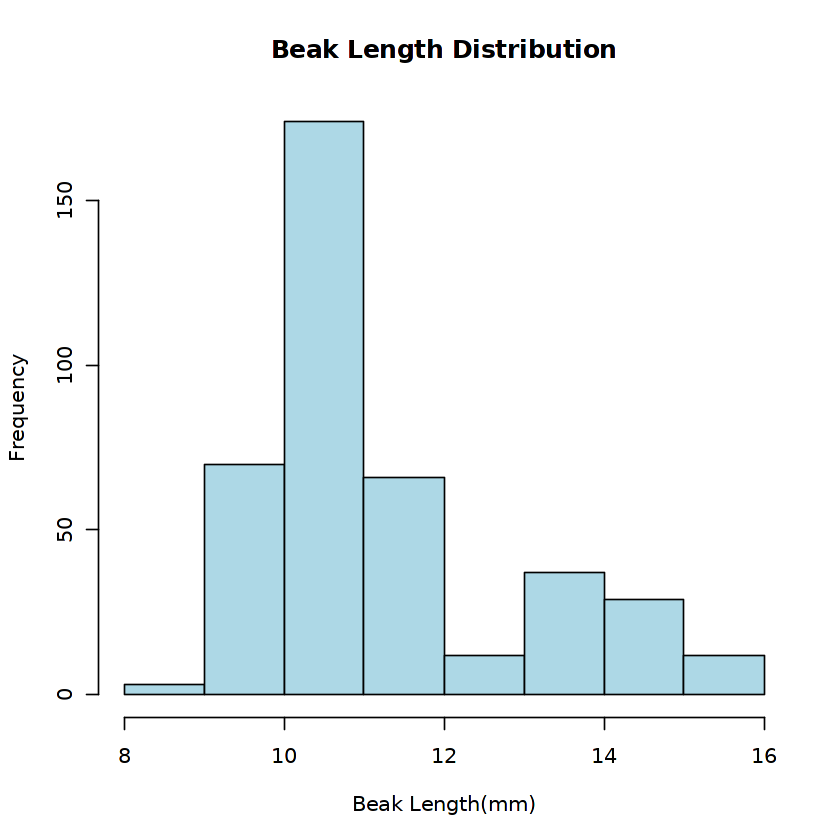

In [12]:
hist(df$Beak.length..mm, main = "Beak Length Distribution", xlab = "Beak Length(mm)", col = "lightblue", border = "black")

In [13]:
percentage_fortis <- (sum(df$species == "fortis") / nrow(df)) * 100
percentage_fortis

[1] 78.41191

In [14]:
(sum(df$species == "scandens") / nrow(df)) * 100

[1] 21.58809

In [16]:
summary(df$Beak.depth..mm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  7.500   8.600   9.100   9.126   9.700  10.980 

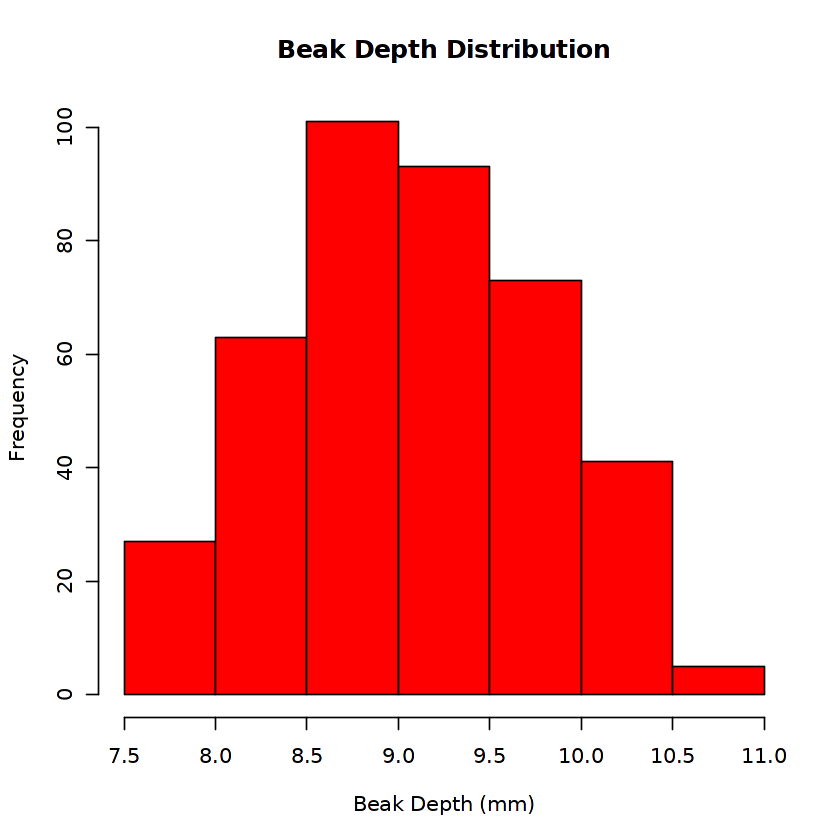

In [17]:
hist(df$Beak.depth..mm, main = "Beak Depth Distribution", xlab = "Beak Depth (mm)",
col = "red", border = "black")

In [20]:
install.packages("ggplot2")

Installing package into '/usr/local/lib/R/site-library'
(as 'lib' is unspecified)

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"


In [21]:
library(ggplot2)

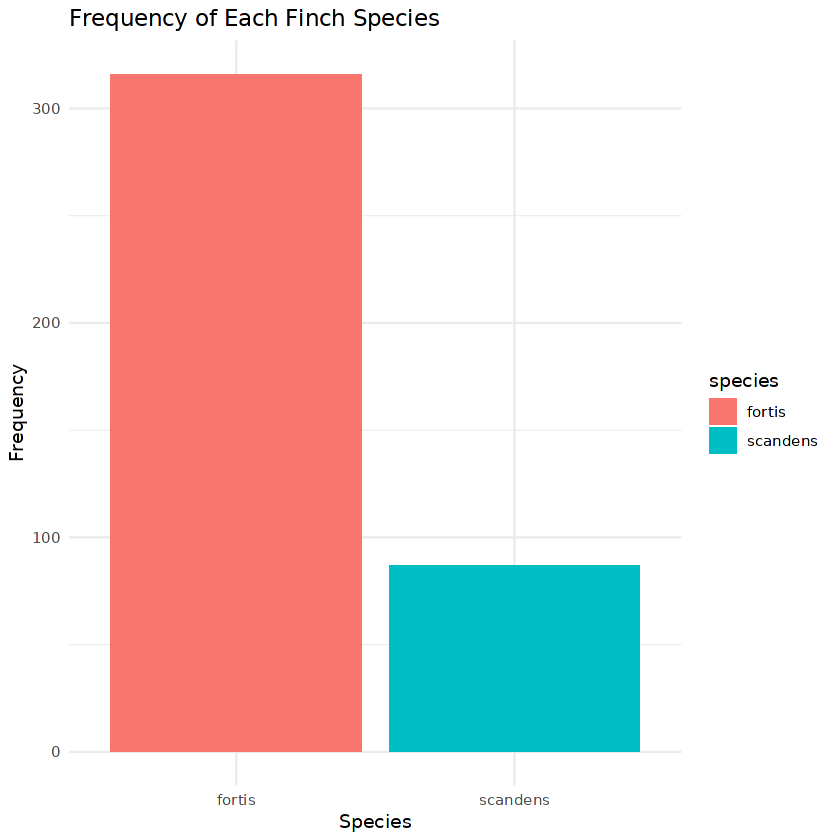

In [24]:
ggplot(df, aes(x = species, fill = species)) +#
 geom_bar() +#
 labs(title = "Frequency of Each Finch Species",#
 x = "Species",#
 y = "Frequency") +#
 theme_minimal()

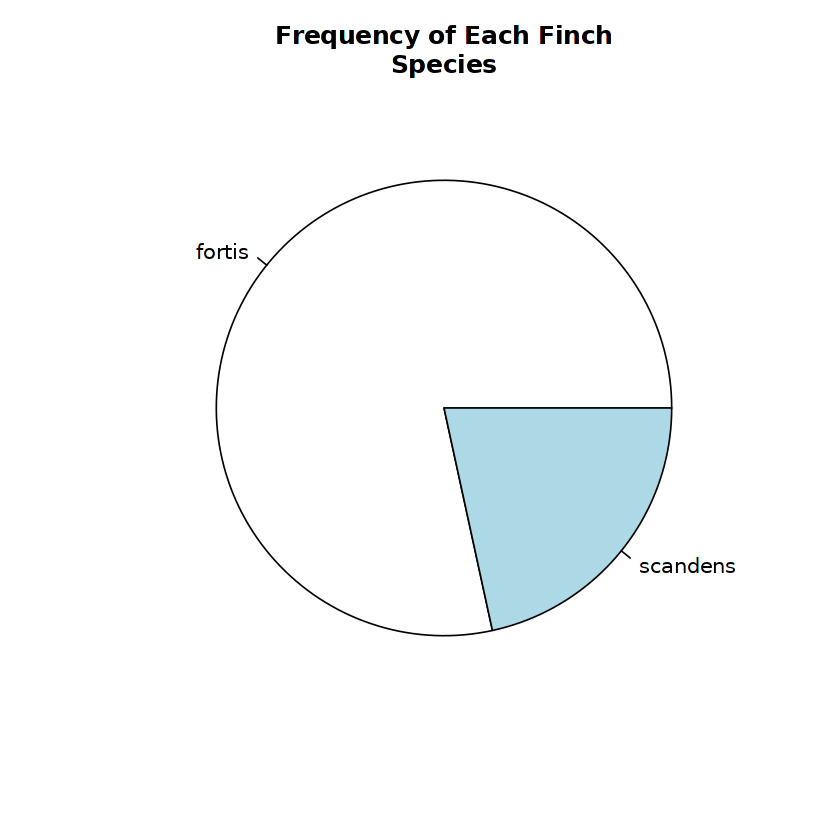

In [25]:
species_freq <- table(df$species)#
#
# Create a pie chart#
pie(species_freq, labels = names(species_freq), main = "Frequency of Each Finch
Species")

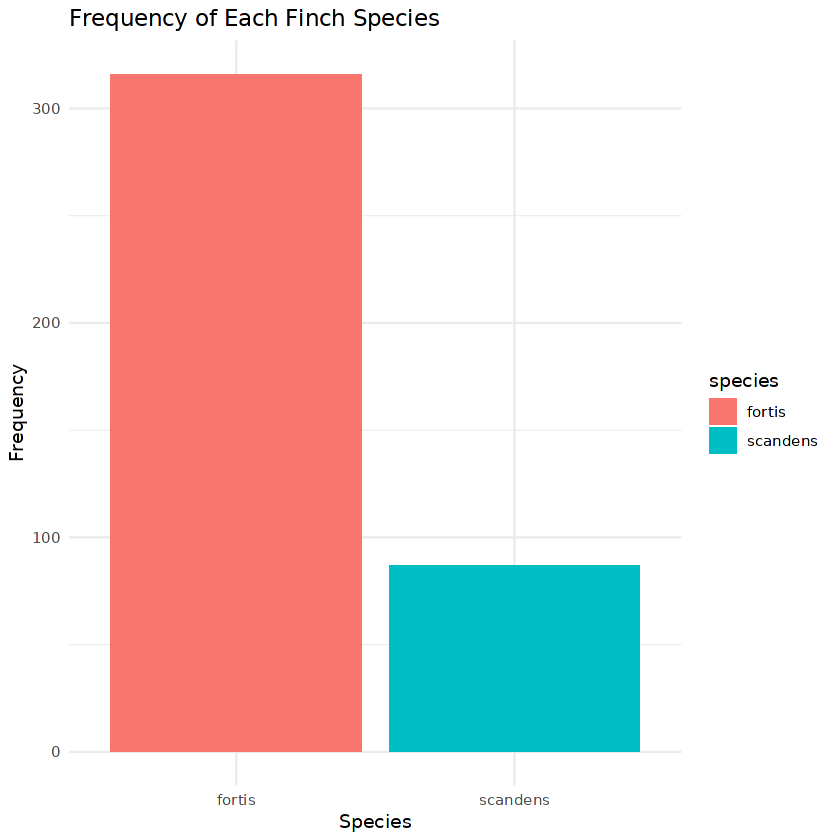

In [26]:
ggplot(df, aes(x = species, fill = species)) +#
 geom_bar() +#
 labs(title = "Frequency of Each Finch Species",#
 x = "Species",#
 y = "Frequency") +#
 theme_minimal()


In [27]:
t_test_result <- t.test(Beak.length..mm ~ species, data = df)#
print(t_test_result)


	Welch Two Sample t-test

data:  Beak.length..mm by species
t = -39.807, df = 126.03, p-value < 2.2e-16
alternative hypothesis: true difference in means between group fortis and group scandens is not equal to 0
95 percent confidence interval:
 -3.732498 -3.378961
sample estimates:
  mean in group fortis mean in group scandens 
              10.56519               14.12092 



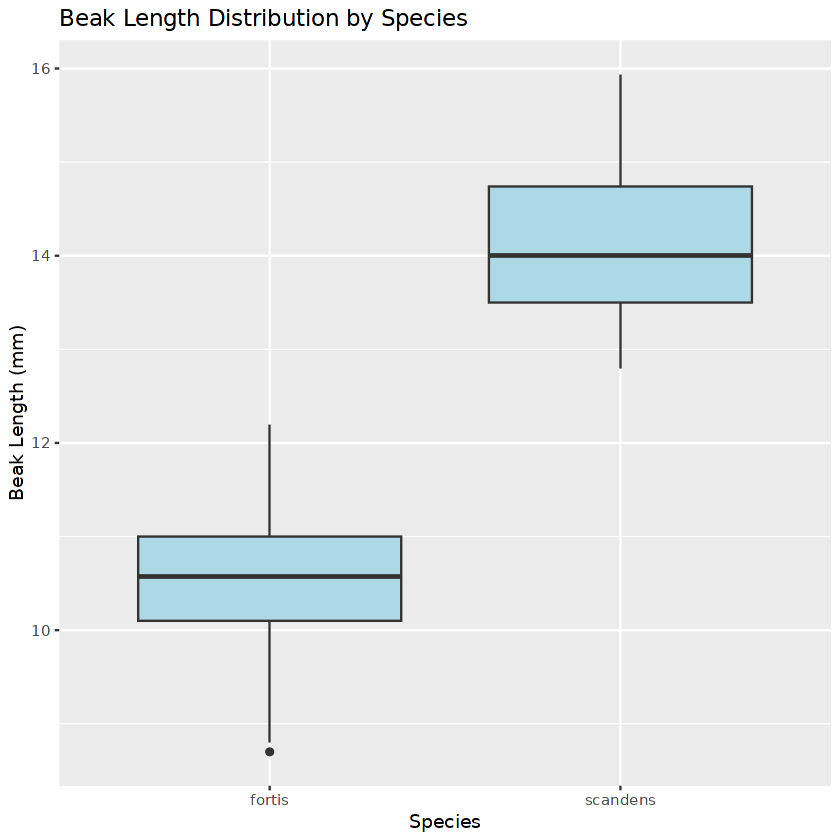

In [29]:
ggplot(df, aes(x = species, y = Beak.length..mm)) +#
 geom_boxplot(fill = "lightblue") +#
 labs(title = "Beak Length Distribution by Species",#
 x = "Species",#
 y = "Beak Length (mm)")

In [30]:
summary(aov(Beak.depth..mm ~ species, data = df))

             Df Sum Sq Mean Sq F value Pr(>F)  
species       1   3.06  3.0558   6.162 0.0135 *
Residuals   401 198.87  0.4959                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

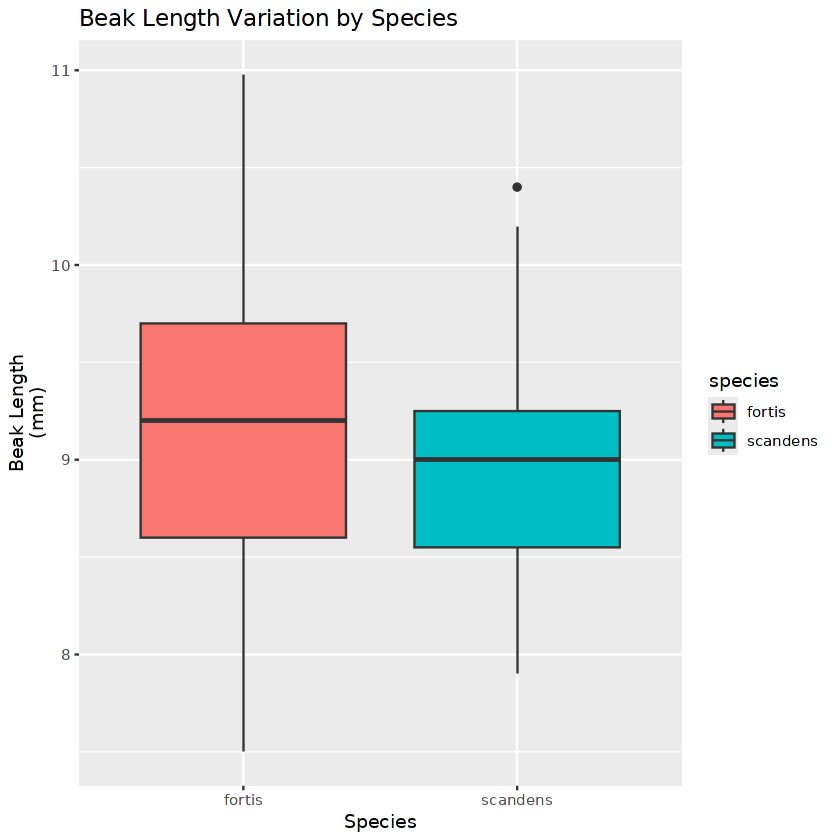

In [31]:
ggplot(df, aes(x = species, y = Beak.depth..mm, fill = species)) +#
 geom_boxplot() +#
 labs(title = "Beak Length Variation by Species", x = "Species", y = "Beak Length
(mm)")

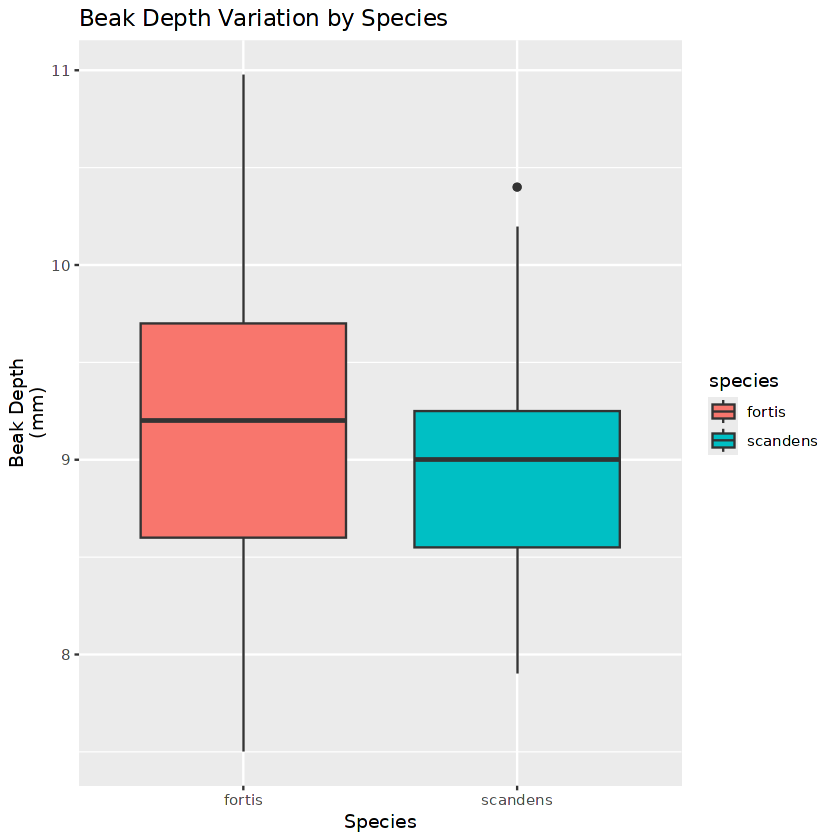

In [32]:
ggplot(df, aes(x = species, y = Beak.depth..mm, fill = species)) +#
 geom_boxplot() +#
 labs(title = "Beak Depth Variation by Species", x = "Species", y = "Beak Depth
(mm)")

In [34]:
lm_model <- lm(Beak.depth..mm ~ Beak.length..mm, data = df)
summary(lm_model)


Call:
lm(formula = Beak.depth..mm ~ Beak.length..mm, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45258 -0.50663 -0.04717  0.52776  1.80701 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.05391    0.24432  32.964  < 2e-16 ***
Beak.length..mm  0.09460    0.02134   4.432  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6929 on 401 degrees of freedom
Multiple R-squared:  0.0467,	Adjusted R-squared:  0.04433 
F-statistic: 19.65 on 1 and 401 DF,  p-value: 1.205e-05


ERROR: Error in qqnorm(lm_model$residuals) + qqline(lm_model$residuals): non-numeric argument to binary operator


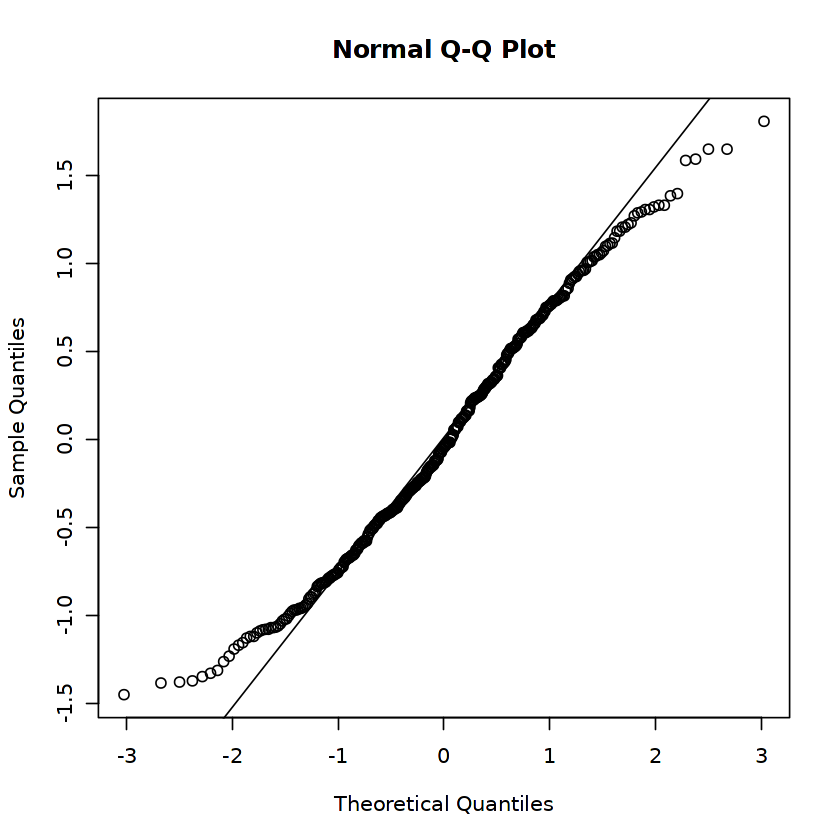

In [35]:
qq_plot <- qqnorm(lm_model$residuals) +#
 qqline(lm_model$residuals) +#
 labs(title = "Normal Q-Q Plot of Residuals")

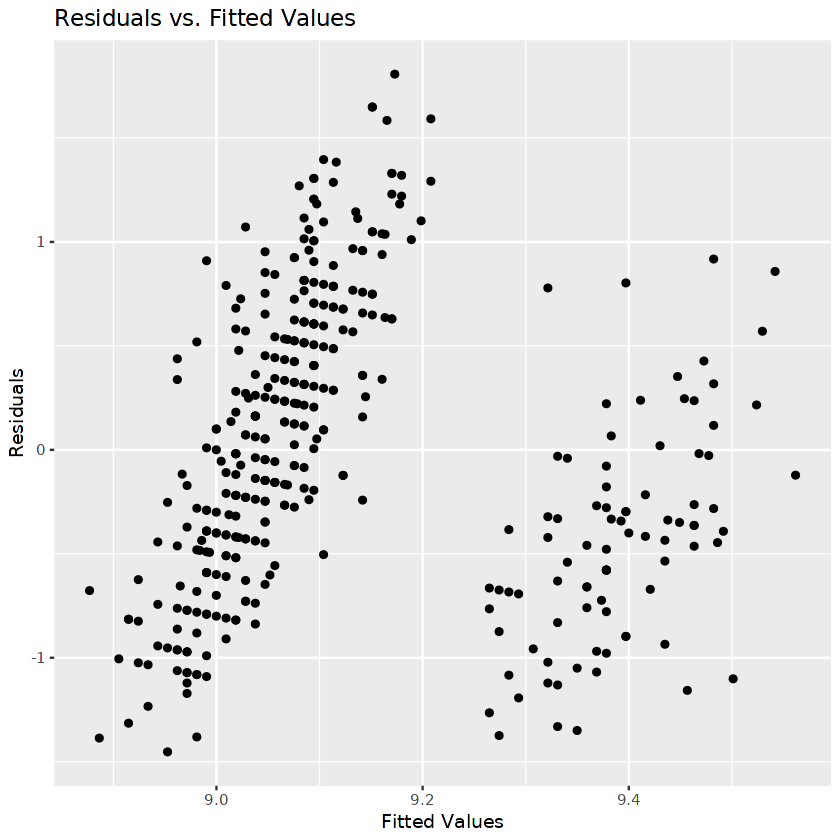

In [36]:
residuals_plot <- ggplot(df, aes(x = lm_model$fitted.values, y =
lm_model$residuals)) +#
 geom_point() +#
 labs(title = "Residuals vs. Fitted Values",#
 x = "Fitted Values",#
 y = "Residuals")
residuals_plot

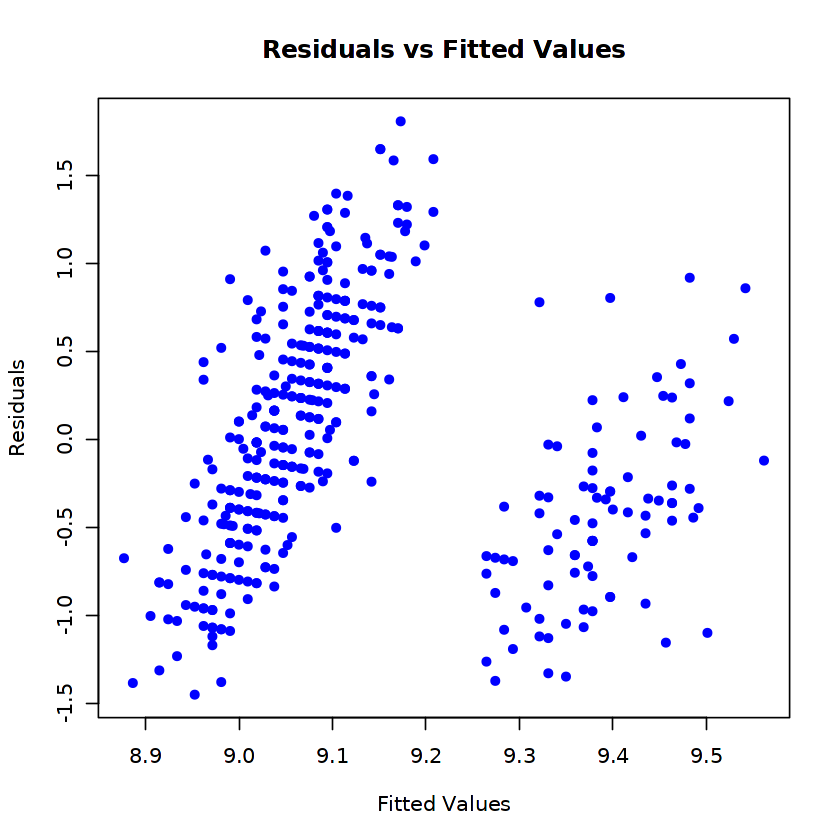

In [38]:
fitted_values <- fitted(lm_model)#
residuals <- residuals(lm_model)#
#
# Plot residuals vs fitted values#
plot(fitted_values, residuals, main = "Residuals vs Fitted Values",#
 xlab = "Fitted Values", ylab = "Residuals", pch = 16, col = "blue")

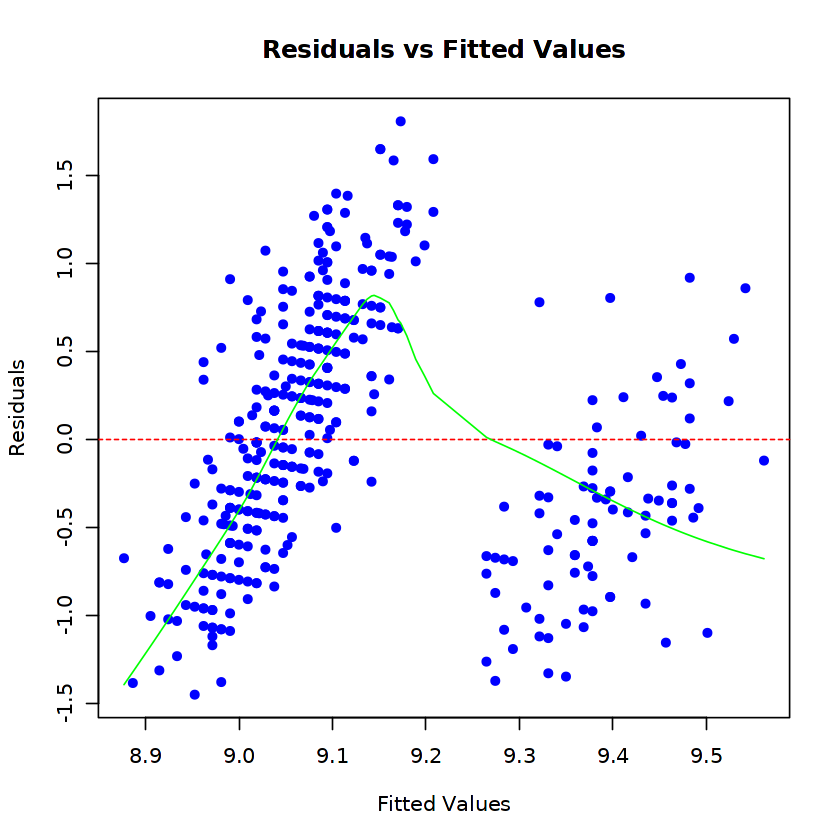

In [44]:
fitted_values <- fitted(lm_model)#
residuals <- residuals(lm_model)#
#
# Plot residuals vs fitted values#
plot(fitted_values, residuals, main = "Residuals vs Fitted Values",#
 xlab = "Fitted Values", ylab = "Residuals", pch = 16, col = "blue")#
#
# Adding a horizontal line at y = 0 for reference#
abline(h = 0, col = "red", lty = 2)#
lines(lowess(fitted_values, residuals), col = "green")#

`geom_smooth()` using formula = 'y ~ x'


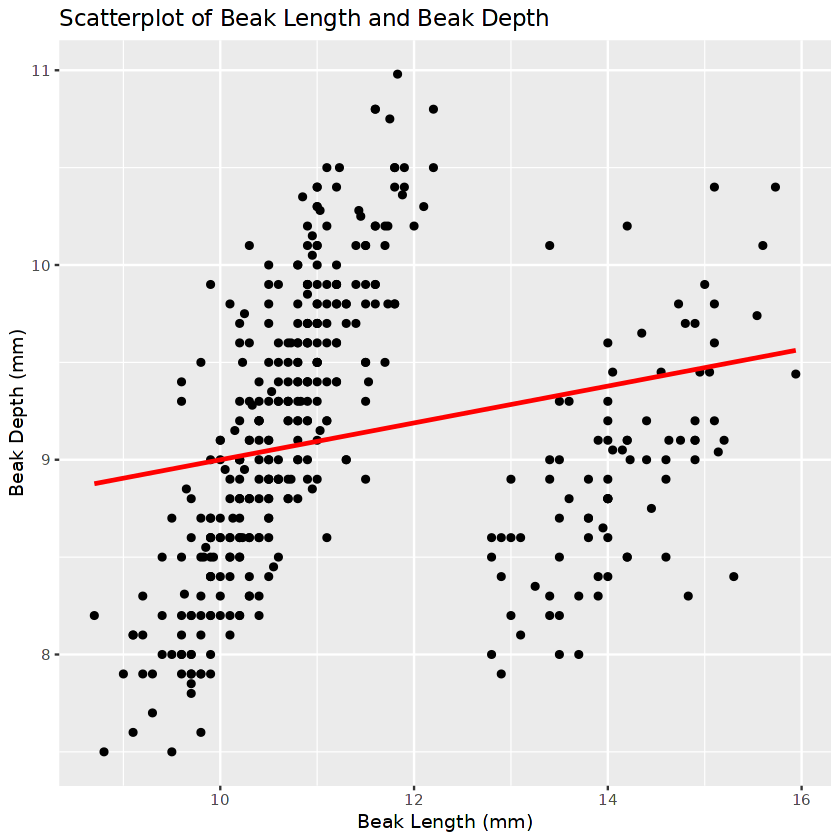

In [47]:
scatter_plot <- ggplot(df, aes(x = Beak.length..mm, y = Beak.depth..mm)) +#
 geom_point() +#
 geom_smooth(method = "lm", se = FALSE, color = "red") +#
 labs(title = "Scatterplot of Beak Length and Beak Depth",#
 x = "Beak Length (mm)",#
 y = "Beak Depth (mm)")
print(scatter_plot)

In [50]:
lm_model <- lm(Beak.depth..mm ~ Beak.length..mm, data = df)
fortis <- subset(df, species == "fortis")
lm <- lm(Beak.depth..mm ~ Beak.length..mm, data = fortis)
summary(lm)


Call:
lm(formula = Beak.depth..mm ~ Beak.length..mm, data = fortis)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11362 -0.28262 -0.02182  0.22679  1.32749 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.34437    0.37388  -0.921    0.358    
Beak.length..mm  0.90069    0.03532  25.504   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4214 on 314 degrees of freedom
Multiple R-squared:  0.6744,	Adjusted R-squared:  0.6734 
F-statistic: 650.4 on 1 and 314 DF,  p-value: < 2.2e-16


ERROR: Error in qqline(lm$residuals) + labs(title = "Normal Q-Q Plot of Residuals"): non-numeric argument to binary operator


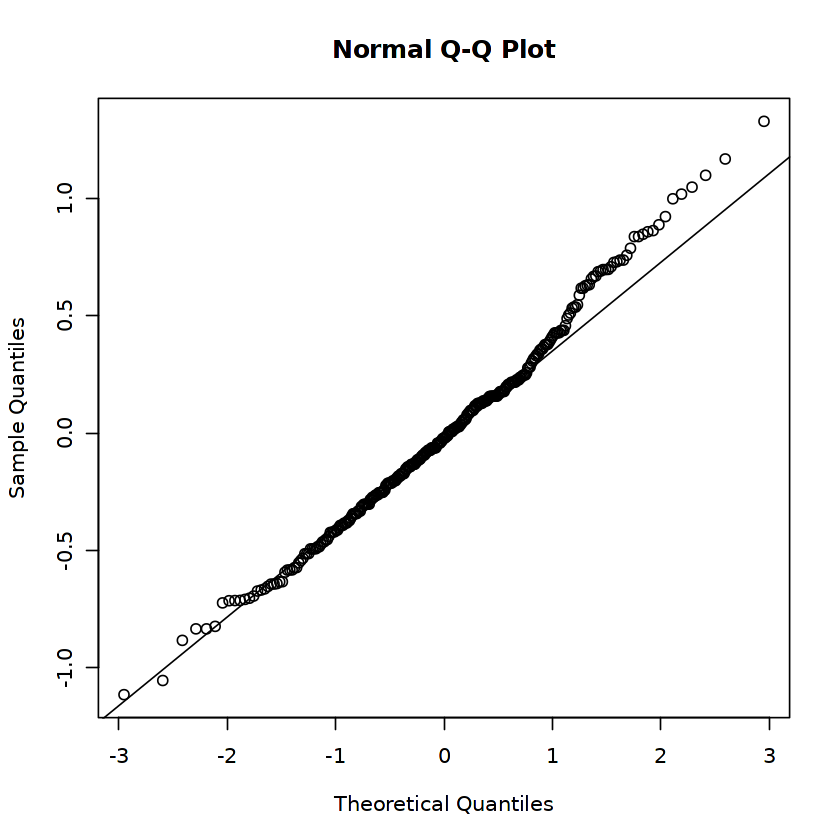

In [52]:
qq_plot <- qqnorm(lm$residuals) #
 qqline(lm$residuals) +#
 labs(title = "Normal Q-Q Plot of Residuals")

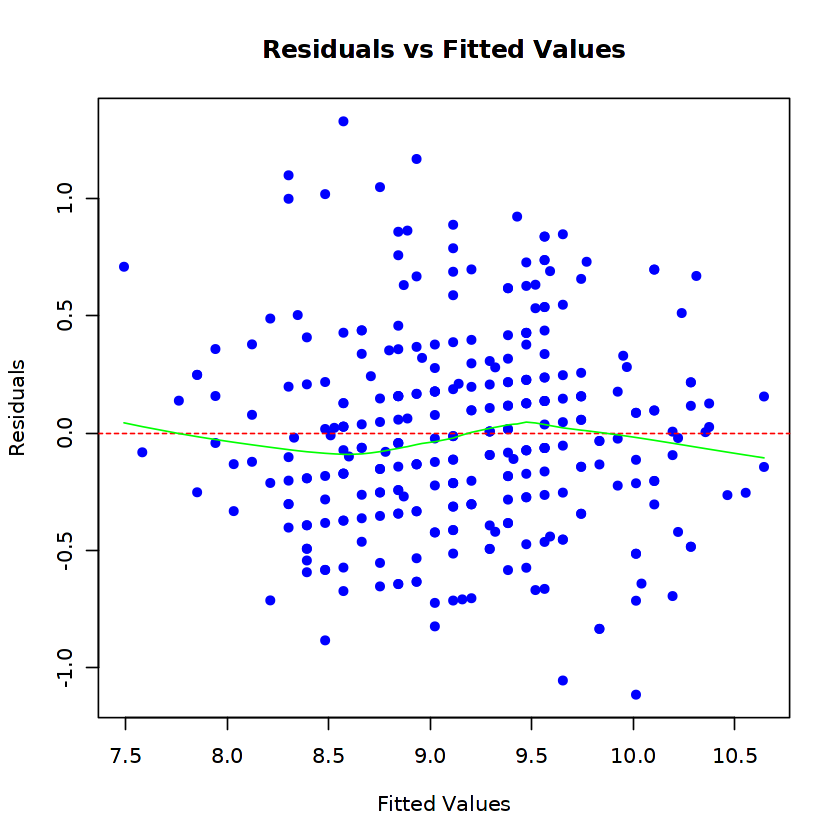

In [53]:
fitted_values <- fitted(lm)#
residuals <- residuals(lm)
# Plot residuals vs fitted values#
plot(fitted_values, residuals, main = "Residuals vs Fitted Values",#
 xlab = "Fitted Values", ylab = "Residuals", pch = 16, col = "blue")#
 # Adding a horizontal line at y = 0 for reference#
 abline(h = 0, col = "red", lty = 2)#
# Add a lowess line#
 lines(lowess(fitted_values, residuals), col = "green")

`geom_smooth()` using formula = 'y ~ x'


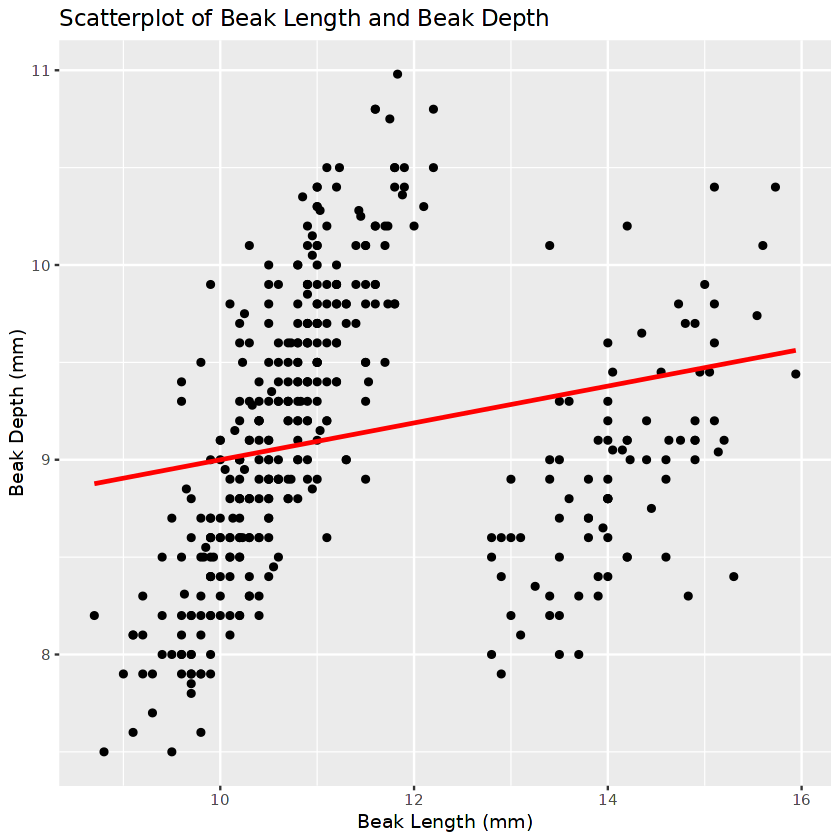

In [55]:
scatter_plot <- ggplot(df, aes(x = Beak.length..mm, y = Beak.depth..mm)) +#
 geom_point() +#
 geom_smooth(method = "lm", se = FALSE, color = "red") +#
 labs(title = "Scatterplot of Beak Length and Beak Depth",#
 x = "Beak Length (mm)",#
 y = "Beak Depth (mm)")#
print(scatter_plot)

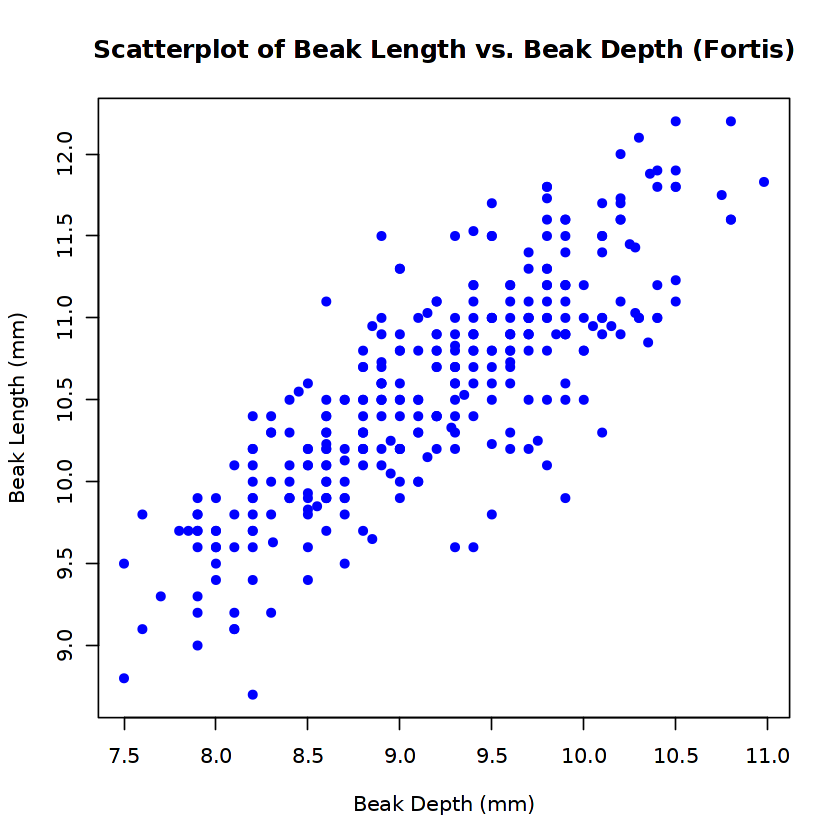

In [59]:
plot(Beak.length..mm ~ Beak.depth..mm, data = fortis,#
 main = "Scatterplot of Beak Length vs. Beak Depth (Fortis)",#
 xlab = "Beak Depth (mm)", ylab = "Beak Length (mm)", pch = 16, col = "blue")